In [1]:
import cv2
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
emotion_label = ["Neutral", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

#emojis unicodes #
emojis = ["\U0001f620","\U0001f922" ,"\U0001f628" ,"\U0001f60A" , "\U0001f625" ,"\U0001f632","\U0001f610"]

In [3]:
print(emojis)

['😠', '🤢', '😨', '😊', '😥', '😲', '😐']


In [4]:
model = load_model('model/fer_bestmodel.hdf5', compile=True )

In [12]:
def emotion_predict(image,v=0):
    facecasc = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(img_gray,scaleFactor=1.3, minNeighbors=10)
    i = 1
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = img_gray[y:y + h, x:x + w]                      #croping
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img/255.0)
        maxindex = int(np.argmax(prediction))
        cv2.putText(image, emotion_label[maxindex], (x+10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 5) 
        i+=1
    if v == 1:
        cv2.imshow("Facial Emotion Recognition (Press ESC to quit)",img)
    else:
        fig = plt.figure(figsize=(30, 30))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Still Image

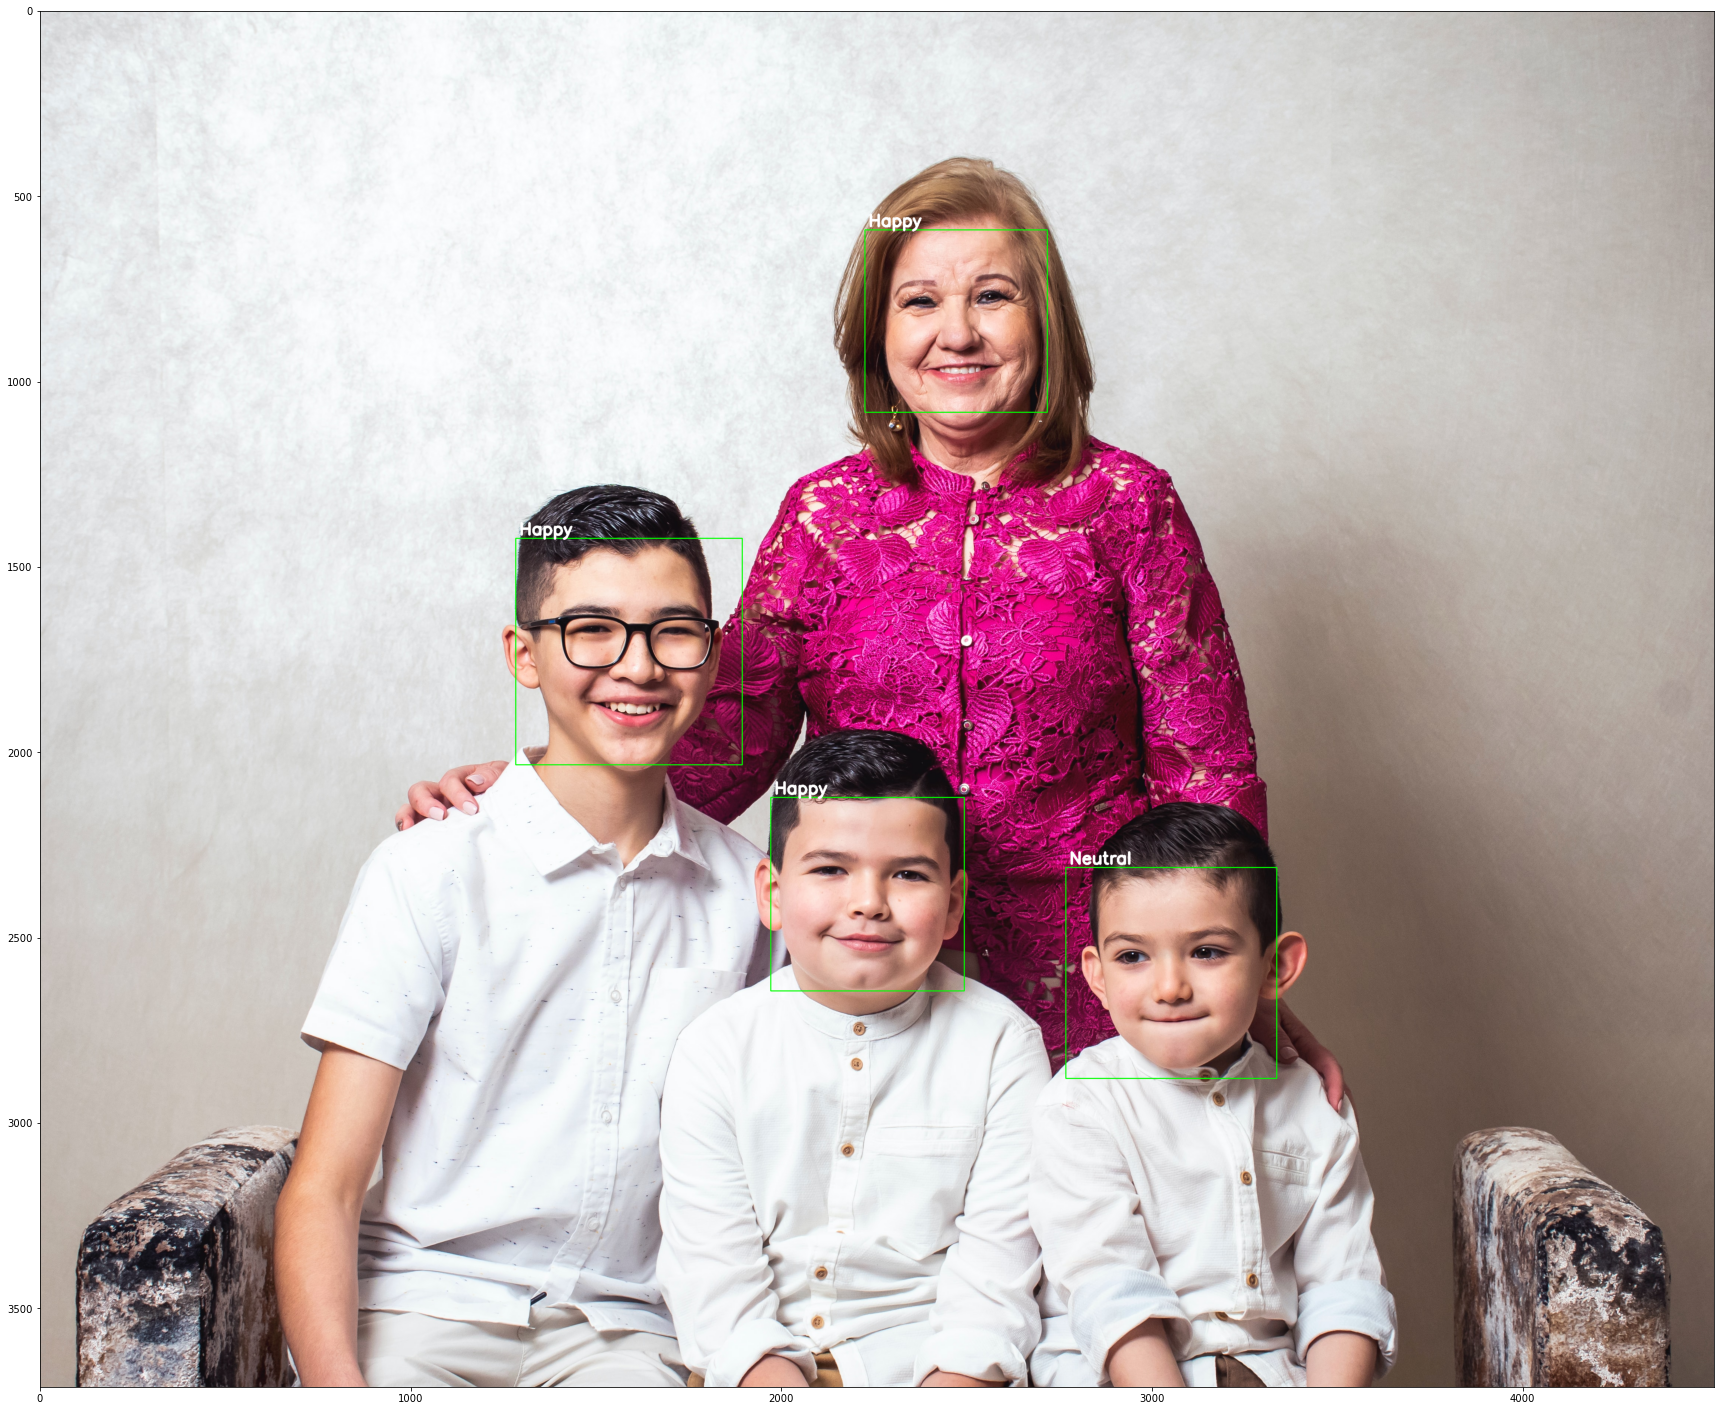

In [13]:
img_file = 'gabriel-tovar--UUfUnOc9-E-unsplash.jpg'
img = cv2.imread(img_file)
emotion_predict(img)

## Video

In [20]:
video_file = "./test_30emotion.mp4"
video = cv2.VideoCapture(video_file)

while True:
    retval,img = video.read()
    if ( retval ):
        emotion_predict(img,True)
    else:
        print("Error, no image from video file")
        break
    # Wait 1 millisecond for any key press        
    if (cv2.waitKey(1)== 27):       # press ESC to quit
        break
cv2.destroyAllWindows()             # close all windows
if video.isOpened(): 
    video.release()